In [4]:
import pandas as pd
import seaborn as sns
import tensorflow
import cv2
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50,VGG16,VGG19,EfficientNetV2B0,Xception
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG, load_img
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D,BatchNormalization,GlobalAveragePooling2D,MaxPooling2D,concatenate, Conv2DTranspose,Conv2D
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_datagen = IDG(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = IDG(rescale=1./255)

In [6]:
train_dir = r"D:\Datasets\Kidney Dataset\Train"
test_dir = r"D:\Datasets\Kidney Dataset\Test"

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 6149 images belonging to 4 classes.
Found 1560 images belonging to 4 classes.


In [4]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(train_data_all,train_labels_all,test_size=0.2,random_state=47)
train_data,val_data,train_labels,val_labels = train_test_split(train_data_all,train_labels_all,test_size=0.2,random_state=47)

In [5]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True) 

In [9]:
pretrained_model= keras.applications.EfficientNetV2B0(include_top=False,input_shape=(224,224,3),pooling='max',classes=4,weights='imagenet')
pretrained_model.trainable=False
x=pretrained_model.output
a=Flatten()(x)
b=Dense(64)(a)
e=Dense(4,activation='softmax')(b)
model=Model(inputs=pretrained_model.input,outputs=e)

In [11]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2,restore_best_weights=True)]
)

Epoch 1/50
192/192 [==============================] - 114s 570ms/step - loss: 1.4439 - accuracy: 0.3739 - val_loss: 1.4014 - val_accuracy: 0.2930
Epoch 2/50
192/192 [==============================] - 107s 557ms/step - loss: 1.3609 - accuracy: 0.3892 - val_loss: 1.2749 - val_accuracy: 0.4798
Epoch 3/50
192/192 [==============================] - 108s 563ms/step - loss: 1.3422 - accuracy: 0.3922 - val_loss: 1.3792 - val_accuracy: 0.4212
Epoch 4/50
192/192 [==============================] - 108s 564ms/step - loss: 1.3173 - accuracy: 0.4090 - val_loss: 1.2780 - val_accuracy: 0.4212
Epoch 5/50
192/192 [==============================] - 108s 562ms/step - loss: 1.3055 - accuracy: 0.4080 - val_loss: 1.2551 - val_accuracy: 0.4271
Epoch 6/50
192/192 [==============================] - 109s 565ms/step - loss: 1.2952 - accuracy: 0.4144 - val_loss: 1.2578 - val_accuracy: 0.4173
Epoch 7/50
192/192 [==============================] - 110s 572ms/step - loss: 1.2917 - accuracy: 0.4094 - val_loss: 1.3095 -

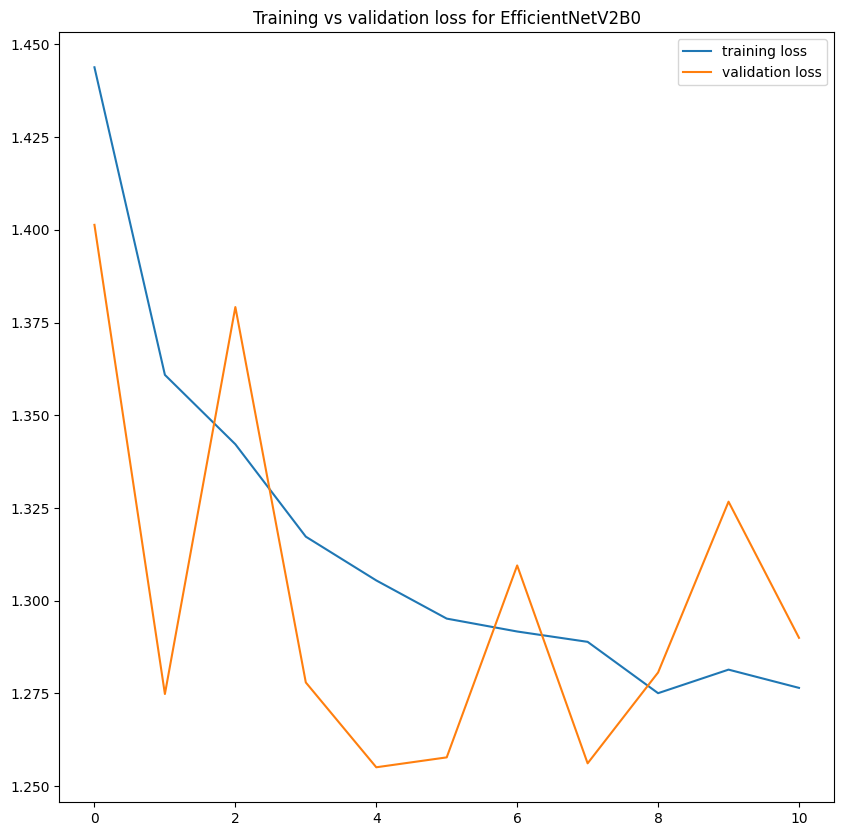

In [16]:
plt.figure(figsize=(10,10))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(["training loss","validation loss"])
plt.title("Training vs validation loss for EfficientNetV2B0")
plt.show()

In [22]:
pretrained_model= keras.applications.VGG19(include_top=False,input_shape=(224,224,3),pooling='max',classes=4,weights='imagenet')
pretrained_model.trainable=False
x=pretrained_model.output
a=Flatten()(x)
b=Dense(64)(a)
e=Dense(4,activation='softmax')(b)
model_2=Model(inputs=pretrained_model.input,outputs=e)

In [23]:
model_2.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])
model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2,restore_best_weights=True)]
)

Epoch 1/50
192/192 [==============================] - 486s 3s/step - loss: 0.8976 - accuracy: 0.6425 - val_loss: 0.7158 - val_accuracy: 0.7188
Epoch 2/50
192/192 [==============================] - 497s 3s/step - loss: 0.6001 - accuracy: 0.7777 - val_loss: 0.5019 - val_accuracy: 0.8112
Epoch 3/50
192/192 [==============================] - 496s 3s/step - loss: 0.5041 - accuracy: 0.8133 - val_loss: 0.4594 - val_accuracy: 0.8210
Epoch 4/50
192/192 [==============================] - 498s 3s/step - loss: 0.4472 - accuracy: 0.8324 - val_loss: 0.3359 - val_accuracy: 0.8802
Epoch 5/50
192/192 [==============================] - 499s 3s/step - loss: 0.3910 - accuracy: 0.8556 - val_loss: 0.3607 - val_accuracy: 0.8613
Epoch 6/50
192/192 [==============================] - 506s 3s/step - loss: 0.3813 - accuracy: 0.8547 - val_loss: 0.2921 - val_accuracy: 0.8906
Epoch 7/50
192/192 [==============================] - 530s 3s/step - loss: 0.3671 - accuracy: 0.8648 - val_loss: 0.3052 - val_accuracy: 0.8835

49/49 [==============================] - 101s 2s/step


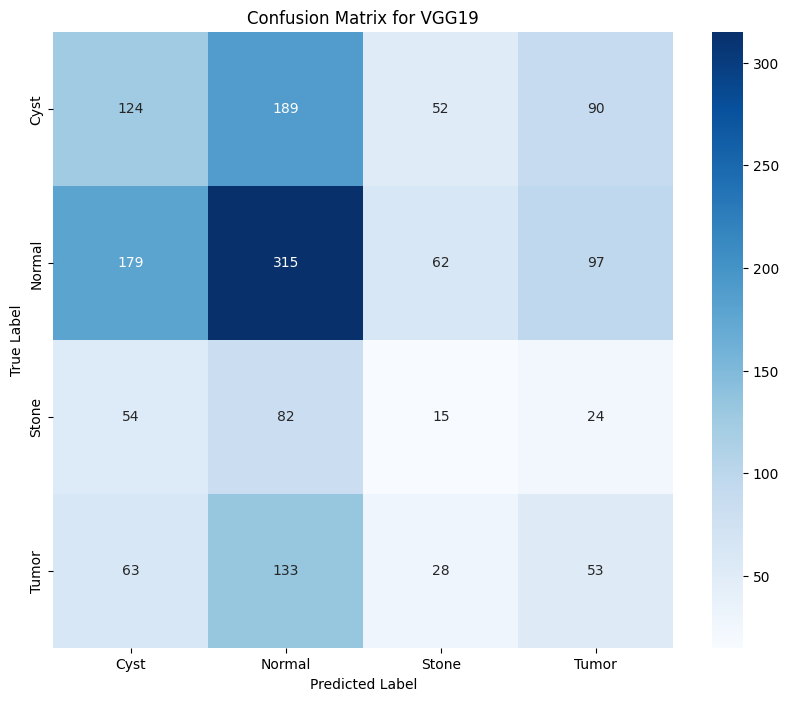

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model_2.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG19')
plt.savefig("D:/confusion_vgg19.png")
plt.show()

In [32]:
model_2.save(r"D:\Project\DL_project\vgg19.keras")